In [14]:
# Import necessary libraries
import pandas as pd

# Load the CSV file
analyzed_data = pd.read_csv('/content/analyzed.csv')

# Load the Excel file
data_excel = pd.read_excel('/content/data.xlsx')

# Display the first few rows of each data frame to verify
print("Analyzed Data:")
print(analyzed_data.head())

print("\nData from Excel:")
print(data_excel.head())

Analyzed Data:
   Unnamed: 0  Merchant Id  Annual_Revenue  Spending_Score           City  \
0           0            1              15              39         Mtwara   
1           1            2              15              81  Zanzibar City   
2           2            3              16               6         Mtwara   
3           3            4              16              77  Zanzibar City   
4           4            5              17              40         Mtwara   

  Most_Purchased_Product  Cluster_Number Cluster_Nature  
0           Mtindi 500ml               2        Careful  
1       Fresh Milk 250ml               3    Spendthrift  
2           Mtindi 500ml               2        Careful  
3       Fresh Milk 250ml               3    Spendthrift  
4           Mtindi 500ml               2        Careful  

Data from Excel:
   Merchant Id  Annual Revenue (k$)  Spending Score (1-100)           City  \
0            1                   15                      39         Mtwara   


In [15]:
# Check for missing values and data types in analyzed_data
print("\nAnalyzed Data Info:")
print(analyzed_data.info())

print("\nMissing Values in Analyzed Data:")
print(analyzed_data.isnull().sum())

# Basic statistical analysis for analyzed_data
print("\nBasic Statistics for Analyzed Data:")
print(analyzed_data.describe())

# Check for missing values and data types in data_excel
print("\nData Excel Info:")
print(data_excel.info())

print("\nMissing Values in Data Excel:")
print(data_excel.isnull().sum())

# Basic statistical analysis for data_excel
print("\nBasic Statistics for Data Excel:")
print(data_excel.describe())

# Handle missing values if any
# For simplicity, let's drop rows with missing values for now
analyzed_data_cleaned = analyzed_data.dropna()
data_excel_cleaned = data_excel.dropna()

print("\nCleaned Analyzed Data Info:")
print(analyzed_data_cleaned.info())

print("\nCleaned Data Excel Info:")
print(data_excel_cleaned.info())


Analyzed Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              200 non-null    int64 
 1   Merchant Id             200 non-null    int64 
 2   Annual_Revenue          200 non-null    int64 
 3   Spending_Score          200 non-null    int64 
 4   City                    200 non-null    object
 5   Most_Purchased_Product  200 non-null    object
 6   Cluster_Number          200 non-null    int64 
 7   Cluster_Nature          200 non-null    object
dtypes: int64(5), object(3)
memory usage: 12.6+ KB
None

Missing Values in Analyzed Data:
Unnamed: 0                0
Merchant Id               0
Annual_Revenue            0
Spending_Score            0
City                      0
Most_Purchased_Product    0
Cluster_Number            0
Cluster_Nature            0
dtype: int64

Basic Statistics for Analyz

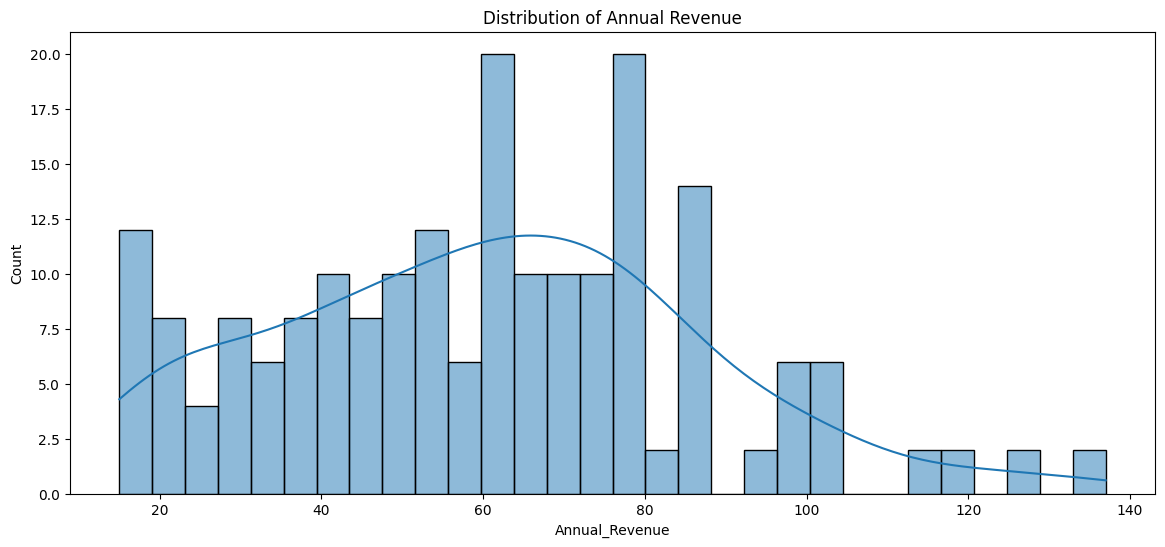

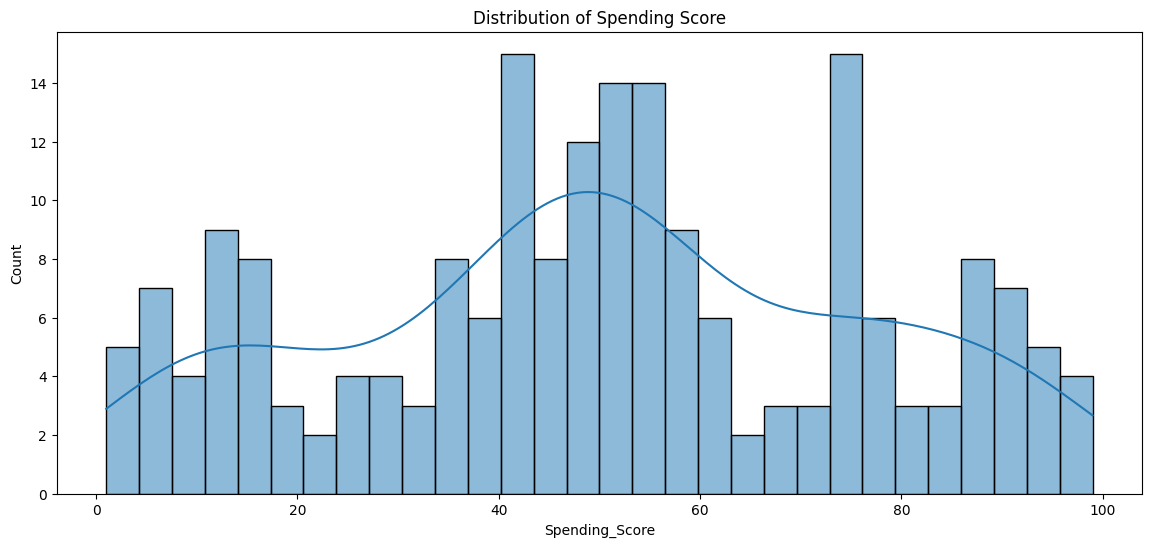

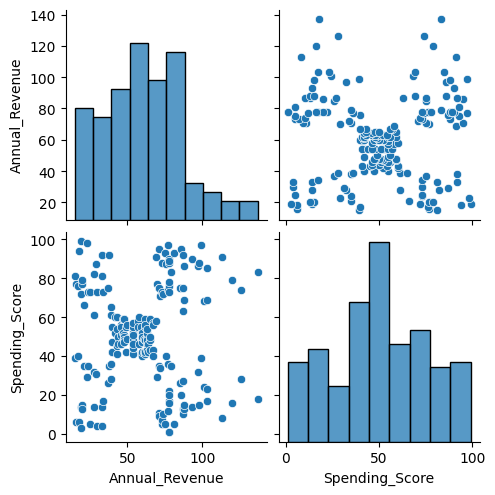

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distributions of key features in analyzed_data
plt.figure(figsize=(14, 6))
sns.histplot(analyzed_data_cleaned['Annual_Revenue'], bins=30, kde=True)
plt.title('Distribution of Annual Revenue')
plt.show()

plt.figure(figsize=(14, 6))
sns.histplot(analyzed_data_cleaned['Spending_Score'], bins=30, kde=True)
plt.title('Distribution of Spending Score')
plt.show()

# Plotting relationships between key features
sns.pairplot(analyzed_data_cleaned[['Annual_Revenue', 'Spending_Score']])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

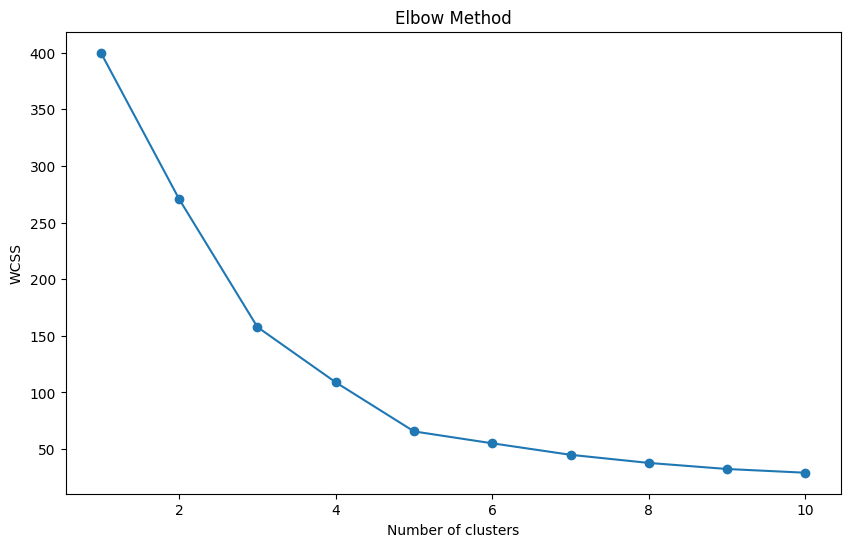

   Unnamed: 0  Merchant Id  Annual_Revenue  Spending_Score           City  \
0           0            1              15              39         Mtwara   
1           1            2              15              81  Zanzibar City   
2           2            3              16               6         Mtwara   
3           3            4              16              77  Zanzibar City   
4           4            5              17              40         Mtwara   

  Most_Purchased_Product  Cluster_Number Cluster_Nature  
0           Mtindi 500ml               2        Careful  
1       Fresh Milk 250ml               3    Spendthrift  
2           Mtindi 500ml               2        Careful  
3       Fresh Milk 250ml               3    Spendthrift  
4           Mtindi 500ml               2        Careful  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Features for clustering
features = analyzed_data_cleaned[['Annual_Revenue', 'Spending_Score']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Assuming the optimal number of clusters is 5 (based on the Elbow curve)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add cluster information to the original dataframe
analyzed_data_cleaned['Cluster_Number'] = clusters

# Define cluster natures (this can be customized based on domain knowledge)
cluster_natures = {
    0: 'General',
    1: 'Miser',
    2: 'Careful',
    3: 'Spendthrift',
    4: 'Target'
}
analyzed_data_cleaned['Cluster_Nature'] = analyzed_data_cleaned['Cluster_Number'].map(cluster_natures)

# Display the first few rows of the dataframe with cluster information
print(analyzed_data_cleaned.head())

In [52]:
!pip install pandas_ods_reader
import pandas as pd
analyzed_data_cleaned
# Save the final data to CSV
analyzed_data_cleaned.to_csv('LastOutput.csv', index=False)

In [58]:
import pandas as pd
from io import BytesIO
import base64
from IPython.display import HTML

# Assuming analyzed_data_cleaned is your DataFrame

# Convert DataFrame to Excel file
excel_file = BytesIO()
analyzed_data_cleaned.to_excel(excel_file, index=False)

# Encode Excel file contents to base64
excel_file_encoded = base64.b64encode(excel_file.getvalue()).decode()

# Generate HTML link to download Excel file
download_link = f'<a href="data:application/vnd.openxmlformats-officedocument.spreadsheetml.sheet;base64,{excel_file_encoded}" download="final_analyzed_data.xlsx">Download Excel file</a>'

# Display the download link
display(HTML(download_link))

In [59]:
# Recommendations based on clusters
recommendations = analyzed_data_cleaned.groupby('Cluster_Nature').agg({
    'Annual_Revenue': ['mean', 'sum'],
    'Spending_Score': 'mean',
    'Merchant Id': 'count'
}).reset_index()

recommendations.columns = ['Cluster_Nature', 'Average_Annual_Revenue', 'Total_Annual_Revenue', 'Average_Spending_Score', 'Merchant_Count']

print("\nRecommendations:")
print(recommendations)


Recommendations:
  Cluster_Nature  Average_Annual_Revenue  Total_Annual_Revenue  \
0        Careful               26.304348                   605   
1        General               55.296296                  4479   
2          Miser               88.200000                  3087   
3    Spendthrift               25.727273                   566   
4         Target               86.538462                  3375   

   Average_Spending_Score  Merchant_Count  
0               20.913043              23  
1               49.518519              81  
2               17.114286              35  
3               79.363636              22  
4               82.128205              39  


In [ ]:
# Customer Segmentation Project

## Project Description
Customer segmentation is important for businesses to understand their target audience. This project aims to help Cow and Buffalo Milk Company identify which merchants they should target to maximize their profits.

## Steps
1. Loaded data from CSV and Excel files.
2. Performed data quality checks and statistical analysis.
3. Cleaned the data by handling missing values.
4. Conducted exploratory data analysis to understand data distributions and relationships.
5. Used K-Means clustering for customer segmentation with five clusters.
6. Saved the final analyzed data with cluster information into a CSV file.
7. Provided recommendations based on clustering results.

## How to Run the Code
1. Ensure you have the necessary data files: `analyzed.csv` and `data.xlsx`.
2. Upload the data files to Google Colab.
3. Run the code cells in the provided order.

## Insights and Recommendations
- Careful: These merchants have moderate spending and good payment scores.
- Spendthrift: High spenders with varying payment scores.
- General: Average spenders and payment scores.
- Target: Merchants that could be targeted for further marketing efforts.
- Miser: Low spenders with lower payment scores.

## Submission
The final analyzed data is saved in `final_analyzed_data.csv`.
The project repository can be found at [GitHub Link].